In [13]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
file_path = "/content/drive/MyDrive/project2/EUR_USD_2000_2025.csv"
df = pd.read_csv(file_path)

df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X,EURUSD=X
1,Date,NaN,NaN,NaN,NaN,NaN
2,2003-12-01,1.19650137424469,1.2040069103240967,1.194400668144226,1.20339834690094,0
3,2003-12-02,1.2088974714279175,1.2109030485153198,1.1946003437042236,1.1961007118225098,0
4,2003-12-03,1.2122975587844849,1.213003396987915,1.2077003717422485,1.208999752998352,0


In [15]:
df.tail(10)

,Price,Close,High,Low,Open,Volume
5465,2024-12-18,1.0495051145553589,1.0515247583389282,1.0467805862426758,1.0495051145553589,0
5466,2024-12-19,1.0350252389907837,1.0422203540802002,1.0352503061294556,1.0350252389907837,0
5467,2024-12-20,1.0364949703216553,1.0433076620101929,1.0344257354736328,1.0364949703216553,0
5468,2024-12-23,1.0433076620101929,1.0448229312896729,1.038594126701355,1.0433076620101929,0
5469,2024-12-24,1.0405826568603516,1.0411244630813599,1.0387451648712158,1.0405826568603516,0
5470,2024-12-25,1.0402579307556152,1.0432968139648438,1.0401498079299927,1.0402579307556152,0
5471,2024-12-26,1.0399551391601562,1.042535424232483,1.0391446352005005,1.0399551391601562,0
5472,2024-12-27,1.0423181056976318,1.0444954633712769,1.0406694412231445,1.0423181056976318,0
5473,2024-12-30,1.0429377555847168,1.0458500385284424,1.0374196767807007,1.0429377555847168,0
5474,2024-12-31,1.040615200996399,1.0424268245697021,1.0348539352416992,1.040615200996399,0


In [19]:
print(df.columns)

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


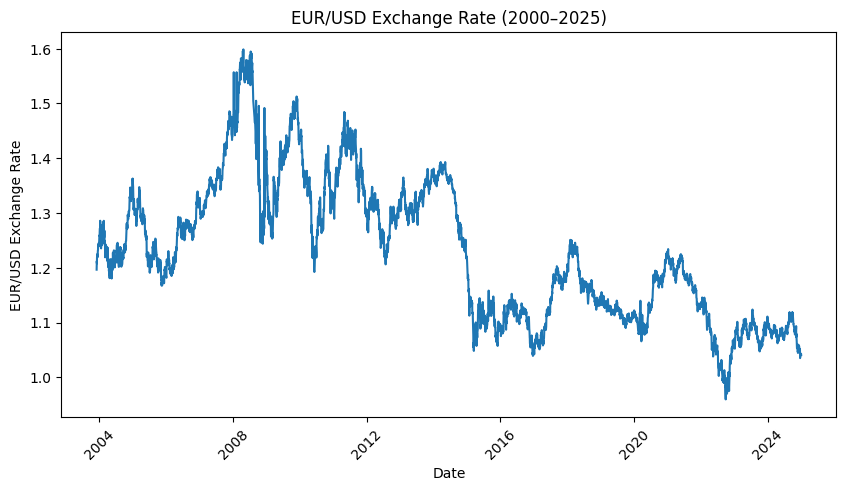

In [26]:
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported if not already

# Create a copy to avoid modifying the original df if it's used elsewhere
df_plot = df.copy()

# Remove the 'level_0' and 'index' columns created by a previous reset_index if they exist
if 'level_0' in df_plot.columns:
    df_plot = df_plot.drop(columns=['level_0'])
if 'index' in df_plot.columns:
    df_plot = df_plot.drop(columns=['index'])

# Drop the first two rows which contain metadata (headers, Ticker/Date labels)
# The actual data starts from row index 2.
df_plot = df_plot.iloc[2:].copy()

# Rename the 'Price' column to 'Date' for clarity in plotting
df_plot = df_plot.rename(columns={'Price': 'Date'})

# Convert the 'Date' column to datetime objects
df_plot['Date'] = pd.to_datetime(df_plot['Date'], errors='coerce')

# Convert the 'Close' column to numeric, coercing errors to NaN
df_plot['Close'] = pd.to_numeric(df_plot['Close'], errors='coerce')

# Drop any rows where 'Date' or 'Close' could not be converted (e.g., NaT or NaN)
df_plot.dropna(subset=['Date', 'Close'], inplace=True)

# Now plot
plt.figure(figsize=(10,5))
plt.plot(df_plot['Date'], df_plot['Close'])
plt.xlabel("Date")
plt.ylabel("EUR/USD Exchange Rate")
plt.title("EUR/USD Exchange Rate (2000–2025)")
plt.xticks(rotation=45)
plt.show()